In [30]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [31]:
#Read the dataset
data=pd.read_csv('covid_database.csv')

#Display the first five rows
print(data.head())

   ID  age_group  Sex  Fever  Cough  Resp_dist  Sore_throat  Chest_pain  \
0   1          1    1      1      0          0            1           1   
1   2          1    1      1      0          0            0           0   
2   3          1    1      1      0          0            0           0   
3   4          1    0      1      1          0            1           1   
4   5          1    0      1      1          1            1           0   

   Headache  Diarrhea  ...  Cancer  Kidney_problems  Fear_of_reinfection  \
0         1         0  ...       0                0                    0   
1         0         0  ...       0                0                    0   
2         0         0  ...       0                0                    0   
3         1         0  ...       0                0                    0   
4         1         0  ...       0                0                    0   

   Hozpitalization  Self_medication  Persistent_symptoms  Depression  \
0                0  

In [32]:
data.groupby('Persistent_symptoms').count()

,ID,age_group,Sex,Fever,Cough,Resp_dist,Sore_throat,Chest_pain,Headache,Diarrhea,...,Heart_disease,Cancer,Kidney_problems,Fear_of_reinfection,Hozpitalization,Self_medication,Depression,Sputum_production,Lack_of_appetite,Fatigue
Persistent_symptoms,,,,,,,,,,,,,,,,,,,,,
0,802,802,802,802,802,802,802,802,802,802,...,802,802,802,802,802,802,802,802,802,802
1,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200


In [33]:
#Check for null values
print(data.isnull().sum())

ID                     0
age_group              0
Sex                    0
Fever                  0
Cough                  0
Resp_dist              0
Sore_throat            0
Chest_pain             0
Headache               0
Diarrhea               0
Dyspnea                0
Myalgia                0
Sleep_disturbance      0
Smoking_habits         0
Physical_exercise      0
Diabetes               0
Hypertension           0
Heart_disease          0
Cancer                 0
Kidney_problems        0
Fear_of_reinfection    0
Hozpitalization        0
Self_medication        0
Persistent_symptoms    0
Depression             0
Sputum_production      0
Lack_of_appetite       0
Fatigue                0
dtype: int64


In [34]:
#Check data types
data.dtypes

ID                     int64
age_group              int64
Sex                    int64
Fever                  int64
Cough                  int64
Resp_dist              int64
Sore_throat            int64
Chest_pain             int64
Headache               int64
Diarrhea               int64
Dyspnea                int64
Myalgia                int64
Sleep_disturbance      int64
Smoking_habits         int64
Physical_exercise      int64
Diabetes               int64
Hypertension           int64
Heart_disease          int64
Cancer                 int64
Kidney_problems        int64
Fear_of_reinfection    int64
Hozpitalization        int64
Self_medication        int64
Persistent_symptoms    int64
Depression             int64
Sputum_production      int64
Lack_of_appetite       int64
Fatigue                int64
dtype: object

In [35]:
#Divide the dataset into independent and dependent variables
X = data.drop(["Persistent_symptoms"], axis=1)
y = data['Persistent_symptoms']

#y = y.values.ravel()
#Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) 

#Data was splitted as 80% train data and 20% test data.
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
#y_train = y_train.values.reshape(-1,1)
#y_test = y_test.values.reshape(-1,1)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (801, 27)
X_test shape: (201, 27)
y_train shape: (801,)
y_test shape: (201,)


In [36]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
#To store results of models, we create two dictionaries
result_dict_train = {}
result_dict_test = {}

In [38]:
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))

Train Score: 0.8439673913043478
Test Score: 0.835820895522388


In [39]:
#Store results in the dictionaries
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)

In [40]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test,y_test))

Train Score: 0.8514596273291926
Test Score: 0.845771144278607


In [41]:
#Store results in the dictionaries
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn.score(X_test,y_test)

In [42]:
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.862694099378882
Test Score: 0.8606965174129353


In [43]:
#Store results in the dictionaries
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(X_test,y_test)

In [44]:
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))

Train Score: 0.7928027950310559
Test Score: 0.8258706467661692


In [45]:
#Store results in the dictionaries
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(X_test,y_test)

In [46]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,y_test))

Train Score: 0.8739285714285714
Test Score: 0.8656716417910447


In [47]:
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(X_test,y_test)

In [48]:
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, y_train, cv=5)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",gnb.score(X_test,y_test))

Train Score: 0.79152950310559
Test Score: 0.7761194029850746


In [49]:
#Store results in the dictionaries
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(X_test,y_test)

In [50]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
print(df_result_train)

,Score
Logistic Train Score,0.843967
KNN Train Score,0.851460
SVM Train Score,0.862694
Decision Tree Train Score,0.792803
Random Forest Train Score,0.873929
Gaussian NB Train Score,0.791530


In [51]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
print(df_result_train)

,Score
Logistic Test Score,0.835821
KNN Test Score,0.845771
SVM Test Score,0.860697
Decision Tree Test Score,0.825871
Random Forest Test Score,0.865672
Gaussian NB Test Score,0.776119


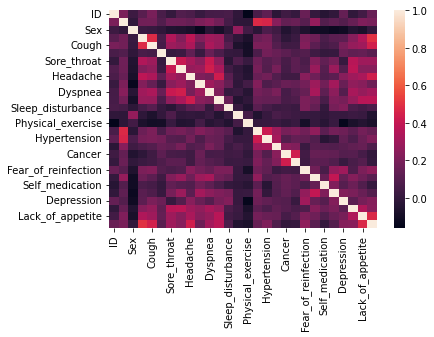

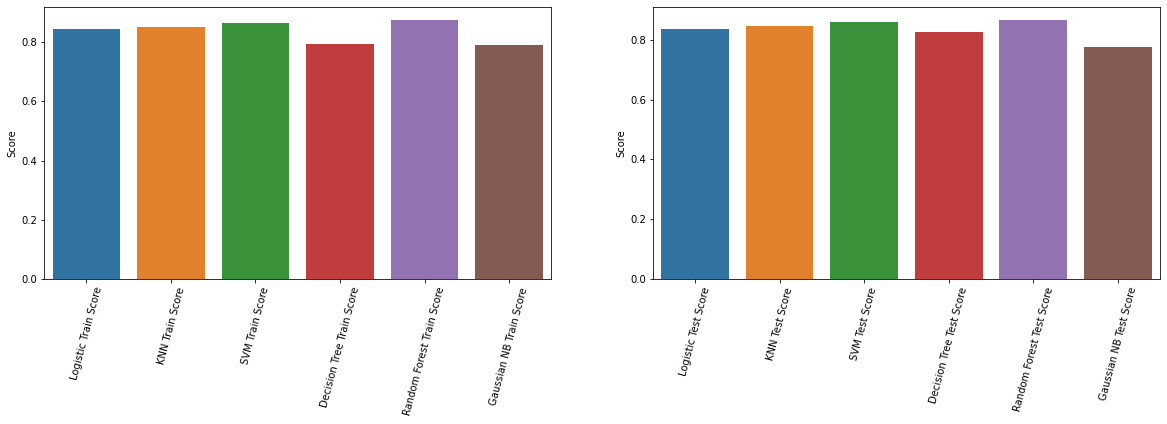

In [57]:
import seaborn as sns

# checking correlation using heatmap
#Loading dataset
cormat = data.corr()
round(cormat,2)  # type: ignore
sns.heatmap(cormat);


fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()